<h1> ОБЯЗАТЕЛЬНО СКАЧАТЬ И ЗАНЕСТИ ПО ПУТИ <a href='https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.3/deeplabv3_xception65_ade20k.h5'>ФАЙЛ</a></h1>


In [22]:
#!c1.32
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
from pixellib.semantic import semantic_segmentation
import wget
import os
from utils import *


Processed Image saved successfuly in your current working directory.


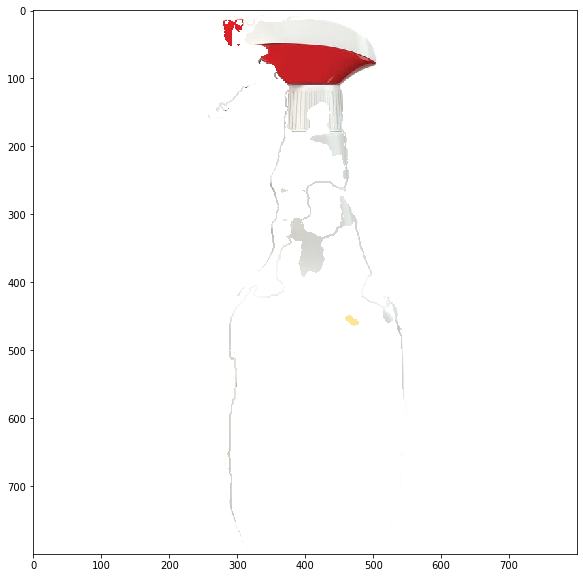

In [20]:
#!c1.32
segmentator = semantic_segmentation()

segmentator_path = './models/deeplabv3_xception65_ade20k.h5'

if not os.path.exists:
    url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.3/deeplabv3_xception65_ade20k.h5'
    wget.download(url, segmentator_path)

segmentator.load_ade20k_model(segmentator_path)

img_path_orig = '/home/jupyter/mnt/datasets/pictures/pic_1363.jpg'
img_path = './processed_imgs/image.jpg'
img = cv2.imread(img_path_orig)
cv2.imwrite(img_path, img)
seg_img_path = './processed_imgs/output_image.jpg'

object_names = load_dictions()

segmentator.segmentAsAde20k(img_path, output_image_name = seg_img_path)

#!c1.32

def remove_objects_by_colors(image_path, seg_path, target_colors, tolerance, output_path):
    image = cv2.imread(image_path)
    seg = cv2.imread(seg_path)
    
    mask = np.zeros(seg.shape[:2], dtype=bool)

    for target_color in target_colors:
        lower_range = np.array([max(0, target_color[0] - tolerance), max(0, target_color[1] - tolerance), max(0, target_color[2] - tolerance)])
        upper_range = np.array([min(255, target_color[0] + tolerance), min(255, target_color[1] + tolerance), min(255, target_color[2] + tolerance)])
        
        mask = mask.astype(bool) | cv2.inRange(seg, lower_range, upper_range).astype(bool)

    result = np.where(mask[:, :, np.newaxis], [255, 255, 255], image)

    cv2.imwrite(output_path, result)
            
            
save_path = './processed_imgs/aboba.png'
colors = []

objects_to_delete = ['wall', 'signboard', 'sky']
for diction in object_names:
    for object_name in objects_to_delete:
        if object_name in diction['object'].split(';'):
            colors.append(list(diction['color'])[::-1])

remove_objects_by_colors(img_path, seg_img_path, colors, 20, save_path)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.imread(save_path)[:, :, ::-1])

In [ ]:
#!c1.32
